# Numpy

In [43]:
import numpy as np 

one_dimensional_array = np.array([1.2, 2.4, 3.5, 4.7, 6.1, 7.2, 8.3, 9.5])
print(one_dimensional_array)

[1.2 2.4 3.5 4.7 6.1 7.2 8.3 9.5]


In [44]:
sequence_of_integers = np.arange(5, 12)
print(sequence_of_integers)

[ 5  6  7  8  9 10 11]


In [45]:
random_integers_between_50_and_100 = np.random.randint(low=50, high=101, size=(10))
print(random_integers_between_50_and_100)

[96 79 66 90 87 52 84 52 74 79]


In [46]:
random_floats_between_0_and_1 = np.random.random([6])
print(random_floats_between_0_and_1)

[0.9821371  0.08342337 0.86362662 0.98864905 0.80658809 0.9961515 ]


In [47]:
random_floats_between_2_and_3 = random_floats_between_0_and_1 + 2.0
print(random_floats_between_2_and_3)

[2.9821371  2.08342337 2.86362662 2.98864905 2.80658809 2.9961515 ]


In [48]:
random_integers_between_150_and_300 = random_integers_between_50_and_100 * 3
print(random_integers_between_150_and_300)

[288 237 198 270 261 156 252 156 222 237]


In [49]:
feature = np.arange(6, 21)
print(feature)

print("\n")

label = (feature * 3) + 4
print(label)

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


[22 25 28 31 34 37 40 43 46 49 52 55 58 61 64]


In [50]:
noise = (np.random.random([15]) * 4) - 2
print(noise)

print("\n")

label = label + noise 
print(label)

[ 0.44891669 -0.68747096  1.87705176  1.62937379 -0.12005652 -0.59065423
 -0.74966949 -1.05486403  1.34494984 -0.92915557  1.61445301  1.17948874
 -1.91077561 -1.71690398 -0.84732879]


[22.44891669 24.31252904 29.87705176 32.62937379 33.87994348 36.40934577
 39.25033051 41.94513597 47.34494984 48.07084443 53.61445301 56.17948874
 56.08922439 59.28309602 63.15267121]


# Pandas

In [51]:
import numpy as np
import pandas as pd

# Create and populate a 5x2 NumPy array.
my_data = np.array([[0, 3], [10, 7], [20, 9], [30, 14], [40, 15]])

# Create a Python list that holds the names of the two columns.
my_column_names = ['temperature', 'activity']

# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)

# Print the entire DataFrame
print(my_dataframe)

   temperature  activity
0            0         3
1           10         7
2           20         9
3           30        14
4           40        15


In [52]:
# Create a new column named adjusted.

X = np.mean(my_data)
my_dataframe["adjusted"] = my_dataframe["activity"] + 2

# Print the entire DataFrame
print(my_dataframe)

   temperature  activity  adjusted
0            0         3         5
1           10         7         9
2           20         9        11
3           30        14        16
4           40        15        17


In [53]:
print("Rows #0, #1, and #2:")
print(my_dataframe.head(3), '\n')

Rows #0, #1, and #2:
   temperature  activity  adjusted
0            0         3         5
1           10         7         9
2           20         9        11 



In [54]:
print("Row #2:")
print(my_dataframe.iloc[[2]], '\n')

Row #2:
   temperature  activity  adjusted
2           20         9        11 



In [55]:
print("Rows #1, #2, and #3:")
print(my_dataframe[1:4], '\n')

Rows #1, #2, and #3:
   temperature  activity  adjusted
1           10         7         9
2           20         9        11
3           30        14        16 



In [56]:
print("Column 'temperature':")
print(my_dataframe['temperature'])

Column 'temperature':
0     0
1    10
2    20
3    30
4    40
Name: temperature, dtype: int32


# Simple Linear Regression with Synthetic Data

In [57]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define functions that build and train a model

Aşağıdaki kod iki işlevi tanımlar:

   * Boş bir model oluşturan `build_model(my_learning_rate)`.
   * `train_model(model, feature, label, epochs)`, geçtiğin örneklerden (feature and label) modeli eğitir.

Şu anda model oluşturma kodunu anlamanız gerekmediğinden, bu kod hücresini gizledik. Bu kodu keşfetmek için isteğe bağlı olarak başlığa çift tıklayabilirsiniz.

In [58]:
#@title Define the functions that build and train a model

def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""

    # En basit tf.keras modelleri sıralıdır.
    # Sıralı bir model bir veya daha fazla katman içerir.

    model = tf.keras.models.Sequential()

    # Modelin topografyasını tanımlayın.
    # Basit bir doğrusal regresyon modelinin topografyası
    #tek bir katmandaki tek bir düğümdür.
    
    model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))

    # Model topografyasını şu kodda derleyin:
    # TensorFlow verimli bir şekilde çalışabilir. Yapılandır
    # modelin ortalama kare hatasını en aza indirmek için eğitim.
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(
            lr=my_learning_rate),
            loss="mean_squared_error",
            metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model  


def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Özellik değerlerini ve etiket değerlerini modele besleyin.
    # Model, belirtilen dönem sayısı için eğitim alacak ve kademeli
    # olarak özellik değerlerinin etiket değerleriyle nasıl ilişkili
    # olduğunu öğrenecektir.
    history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the 
    # rest of history.
    epochs = history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    #Spesifik olarak, her bir hist modelin kök ortalama kare hatasını toplayın.
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [59]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""

    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')

    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/10


C:\Users\saban.kara.d\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 197ms/step - loss: 1198.1626 - root_mean_squared_error: 34.6145
Epoch 2/10
1/1 [==============================] - 0s 408us/step - loss: 1180.1692 - root_mean_squared_error: 34.3536
Epoch 3/10
1/1 [==============================] - 0s 0s/step - loss: 1167.2473 - root_mean_squared_error: 34.1650
Epoch 4/10
1/1 [==============================] - 0s 18ms/step - loss: 1156.5057 - root_mean_squared_error: 34.0074
Epoch 5/10
1/1 [==============================] - 0s 0s/step - loss: 1147.0272 - root_mean_squared_error: 33.8678
Epoch 6/10
1/1 [==============================] - 0s 602us/step - loss: 1138.3870 - root_mean_squared_error: 33.7400
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 1130.3483 - root_mean_squared_error: 33.6207
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 1122.7640 - root_mean_squared_error: 33.5077
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 1115.5356 - roo

C:\Users\saban.kara.d\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


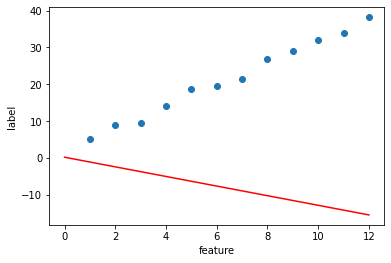

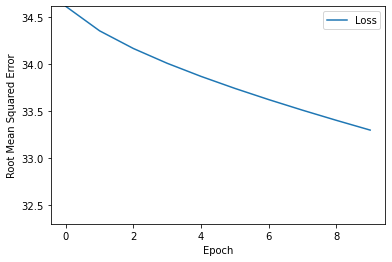

In [62]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

learning_rate=0.01 
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [63]:
https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=linear_regression_synthetic_tf2-colab&hl=en#scrollTo=eD1hTmdd0uCo

SyntaxError: invalid syntax (Temp/ipykernel_14332/2378119688.py, line 1)